## Duplica la siguiente imagen

Saving Screen Shot 2023-11-14 at 19.05.15.png to Screen Shot 2023-11-14 at 19.05.15 (2).png


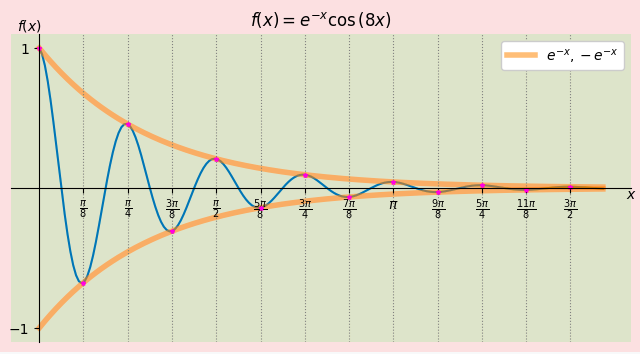

In [107]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()
file_name = next(iter(uploaded))

Image(file_name)

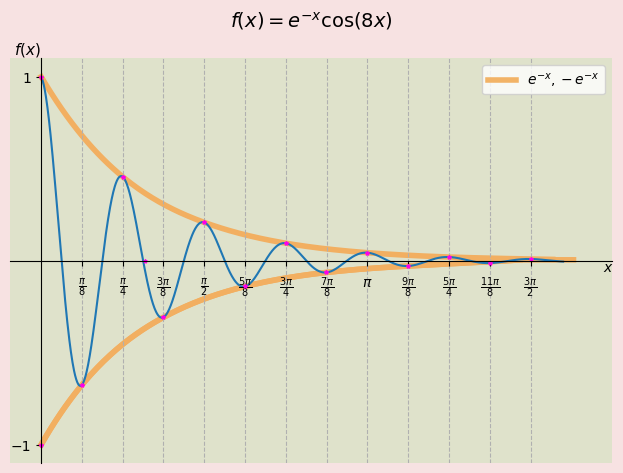

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.patches as patches

fig = plt.figure()
ax = fig.add_subplot()

#FONDO 1
fig.patch.set_facecolor((247/255, 226/255, 226/255, 1))

# Valores de oscilaciones
x = np.linspace(0, 1.6 * np.pi, 1000)  # Ajustado hasta 1.6 *pi, solo valores positivos
y = np.exp(-x) * np.cos(8 * x)

# SPINES
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position("zero")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position("zero")

ax.set_xlim(-0.3, 1.75 * np.pi)  # Ajustado hasta 1.7*pi
ax.set_ylim(-1.1, 1.1)
ax.set_yticks([-1, 1])  # Muestra solo -1 y 1 en el eje y

#FONDO 2
background_color = patches.Rectangle((-0.3, -1.1), 1.75 * np.pi + 0.3, 3.1, color=(223/255, 226/255, 203/255, 1))
ax.add_patch(background_color)

xticks = [np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8, np.pi,
          9*np.pi/8, 5*np.pi/4, 11*np.pi/8, 3*np.pi/2]

ax.set_xticks(xticks)
ax.set_xticklabels(["$\\frac{\pi}{8}$", "$\\frac{\pi}{4}$", "$\\frac{3\pi}{8}$", "$\\frac{\pi}{2}$",
                    "$\\frac{5\pi}{8}$", "$\\frac{3\pi}{4}$", "$\\frac{7\pi}{8}$", "$\pi$",
                    "$\\frac{9\pi}{8}$", "$\\frac{5\pi}{4}$", "$\\frac{11\pi}{8}$", "$\\frac{3\pi}{2}$"],y=-0.028)

# Crea el grid
ax.grid(True, axis="x", linestyle="--", zorder=0)  # Color del grid

# LINEA 1
x_points = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2]
y_points = [1] + [np.exp(-point) * np.cos(8 * point) for point in x_points[1:]]

unique_indices = np.unique(x_points, return_index=True)[1]
x_points = np.array(x_points)[unique_indices]
y_points = np.array(y_points)[unique_indices]
spl = make_interp_spline(x_points, y_points, k=3)
x_smooth = np.linspace(0, 1.6 * np.pi - 0.1, 300)
y_smooth = spl(x_smooth)
ax.plot(x_smooth, y_smooth, color='#f2af61', linewidth=4, zorder=1)

# LINEA 2
x_points_new = [0, np.pi/8, 3*np.pi/8, 5*np.pi/8, 7*np.pi/8, 9*np.pi/8, 3*np.pi/2]
y_points_new = [-1] + [np.exp(-point) * np.cos(8 * point) for point in x_points_new[1:]]

unique_indices_new = np.unique(x_points_new, return_index=True)[1]
x_points_new = np.array(x_points_new)[unique_indices_new]
y_points_new = np.array(y_points_new)[unique_indices_new]
spl_new = make_interp_spline(x_points_new, y_points_new, k=3)
x_smooth_new = np.linspace(0, 1.5 * np.pi - 0.1, 300)
y_smooth_new = spl_new(x_smooth_new)
ax.plot(x_smooth_new, y_smooth_new, color='#f2af61', linewidth=4, zorder=1)
#suavizar linea final
x_smooth_new = np.append(x_smooth_new, [1.6 * np.pi, 1.6 * np.pi + 0.1])
y_smooth_new = np.append(y_smooth_new, [y_smooth_new[-1], y_smooth_new[-1]])
ax.plot(x_smooth_new, y_smooth_new, color='#f2af61', linewidth=4, zorder=1)

# CREACIÓN DE *
for x_tick in xticks:
    index = np.abs(x - x_tick).argmin()
    ax.plot(x[index], y[index], '*', markersize=3, color=(255/255, 0/255, 230/255))

# Color leyenda
ax.plot(x, y, label="$e^{-x}, -e^{-x}$", zorder=1)

# "x" cursiva
linea_x = np.linspace(3 * np.pi / 2, 3 * np.pi / 2 + 0.7, 100)
ax.text(3 * np.pi / 2 + 0.7, 0, r'$\mathit{x}$', ha='left', va='top')  # Ajusta la posición y

ax.set_title(r"$\mathit{f(x) = e^{-x}\cos(8x)}$", fontsize=14, ha='center', va='top', y=1.1)
ax.text(0, 1.1, r'$\mathit{f(x)}$', ha='right', va='bottom', fontsize=11)

# Leyenda
legend = ax.legend(loc="upper right")
legend.get_lines()[0].set_linestyle('-')
legend.get_lines()[0].set_color('#f2b366')
legend.get_lines()[0].set_linewidth(4.0)  # Ajusta el ancho de la línea en la leyenda

# Creación de * en (1, 0) y (-1, 0)
ax.plot(1, 0, '*', markersize=2.8, color=(255/255, 0/255, 230/255))
index_minus_one = np.argmin(np.abs(x + 1))
ax.plot(x[index_minus_one], y[index_minus_one], '*', markersize=3, color=(255/255, 0/255, 230/255))
plt.draw() #* uno
index_minus_one = np.argmin(np.abs(x_points_new - (-1)))
ax.plot(x_points_new[index_minus_one], y_points_new[index_minus_one], '*', markersize=3, color=(255/255, 0/255, 230/255)) #* dos

plt.tight_layout()
plt.show()